# Линейные отображения

Перейдем с решения СЛУ на использование матриц для представления линейных отображений между векторными пространствами.

Отображение между векторными пространствами - это правило, которое связывает входные векторы с выходными векторами. Мы говорим, что входные векторы "отображаются" на выходные векторы. Входные и выходные векторы могут находиться в разных пространствах или в одном и том же пространстве.

## Линейность
Отображение $T$ считается линейным, если выполняются два следующих свойства для любого скаляра $k$ и любых векторов-аргументов $U$ и $V$.

$T(kV)$ = $kT(V)$

$T(U + V)$ = $T(U) + T(V)$

## Представление через матрицы

Любое отображение $T: \mathbb{R}^k \to \mathbb{R}^m$ 
при выборе базисов $e = (e_1, \ldots, e_k )$ $f = (f_1, \ldots, f_m)$ в пространствах $\mathbb{R}^k$ и $\mathbb{R}^m$ соответственно, может быть описано с помощью умножения на матрицу слева $T(x) = [T]_{ef} x $, $[T]_{ef}$ - матрица отображения $T$ в базисах $e$, $f$

Композиция линейных отображений соответствует умножению матриц: $T \circ P (x) = [T][P]x$

Тривиальным способом переносится сложение отображений и умножение на скаляр

## Случай $\mathbb{R}^2$

Рассмотрим линейный оператор $T: \mathbb{R}^2 \to \mathbb{R}^2$, матрица этого оператора в базисе $e = (e_1, e_2)$ будет выглядеть следующим образом: $T = \left[T(e_1) | T(e_2)\right]$, то есть в столбцах будет записаны отображения базисных векторов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Примеры $T: \mathbb{R}^2 \to \mathbb{R}^2$

### Пример 1: Горизонтальное растяжение
В качестве первого примера рассмотрим линейный оператор, определенный следующим образом.

$$
T\left(\left[ \begin{array}{r} 1 \\ 0  \end{array}\right]\right)= \left[ \begin{array}{r} 2 \\ 0  \end{array}\right] \hspace{1in}  T\left(\left[ \begin{array}{r} 0 \\ 1  \end{array}\right]\right)= \left[ \begin{array}{r} 0 \\ 1  \end{array}\right]
$$

Соответствующая матрица для этого преобразования равна

$$
A = \left[ \begin{array}{cc} 2 & 0 \\ 0 & 1 \end{array}\right]
$$

Изображение общего вектора с компонентами $c_1$ и $c_2$ представляет собой линейную комбинацию изображений базисных векторов.

$$
T\left(\left[ \begin{array}{r} c_1 \\ c_2  \end{array}\right]\right) = T\left(c_1\left[ \begin{array}{r} 1 \\ 0  \end{array}\right] + c_2 \left[ \begin{array}{r} 0 \\ 1  \end{array}\right]\right) = c_1T\left(\left[ \begin{array}{r} 1 \\ 0  \end{array}\right]\right) + c_2 T\left(\left[ \begin{array}{r} 0 \\ 1  \end{array}\right]\right)  = c_1\left[ \begin{array}{r} 2 \\ 0  \end{array}\right] + c_2\left[ \begin{array}{r} 0 \\ 1  \end{array}\right]  = \left[ \begin{array}{cc} 2 & 0 \\ 0 & 1 \end{array}\right] \left[\begin{array}{c} c_1 \\ c_2 \end{array}\right]
$$

Для визуального понимания создадим график лин. оператора, изображающий несколько векторов-аргументов и их отображения. 

Поскольку мы будем умножать разные вектора $(c_1, c_2)$ на одну и ту же матрицу, мы можем организовать вычисления, построив матрицу с колонками, соответствующими векторам-аргументам. Эта матрица представлена массивом с меткой $\texttt{vecs}$ в представленном ниже коде. Мы будем использовать numpy-срезы, чтобы обозначить первую строку как $\texttt{x}$, а вторую строку как $\texttt{y}$ для отрисовки.

In [2]:
vecs = np.array([[0, 0],[0.5, 0.5],[0.5, 1.5],[0, 1],[0, 0]]).T
A = np.array([[3,0],[0,1]])
images = A @ vecs

Колонки массива $\texttt{images}$ представляют собой изображения векторов, составляющих колонки массива $\texttt{vecs}$. Давайте построим координаты и посмотрим на эффект преобразования. Красные точки отображают исходные координаты, а новые координаты показаны синим цветом.

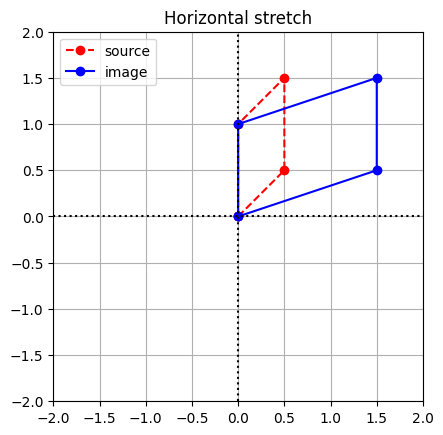

In [3]:
def draw_transformation(vecs, images, title, xlim=(-2, 2), ylim=(-2, 2)):
    # Создадим объекты фигура и оси, подробнее в документации matplotlib
    fig, ax = plt.subplots()

    # Нарисуем точки vecs[0, :], vecs[1, :] - первая и вторая координата исходных векторов
    ax.plot(vecs[0, :], vecs[1, :], color='r', marker='o', linestyle='dashed', label='source')
    ax.plot(images[0, :], images[1, :], color='b', marker='o', label='image')

    # Дополнительная красота
    ax.axvline(x=0,color="k",ls=":")
    ax.axhline(y=0,color="k",ls=":")
    ax.grid(True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.legend()
    ax.set_title(title)
    return fig

draw_transformation(vecs, images, title='Horizontal stretch');

Мы видим, что в итоге многоугольник был горизонтально растянут.

### Задание 1

Составьте матрицу растяжения вдоль оси y и нарисуйте результат применения матрицы на вектора vecs

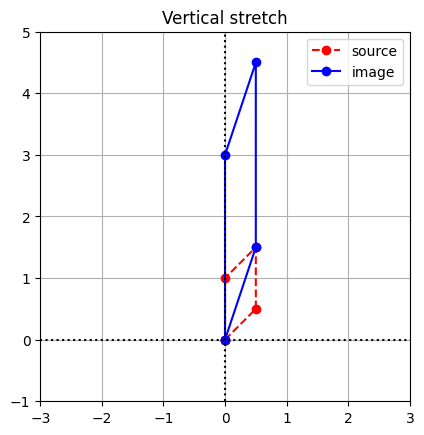

In [4]:
B = np.array([[1, 0], [0, 3]])
images = B @ vecs
draw_transformation(vecs, images, title='Vertical stretch', xlim=(-3, 3), ylim=(-1, 5));



### Пример 2: Отражение
Теперь, когда у нас есть набор векторов, сохраненных в матрице $\texttt{vecs}$, давайте рассмотрим другое преобразование, определенное матрицей $B$.

$$
B = \left[ \begin{array}{cc} -1 & 0 \\ 0 & 1 \end{array}\right]
$$
  
Мы создаем новый массив $B$, но повторно используем код для построения из предыдущего примера.

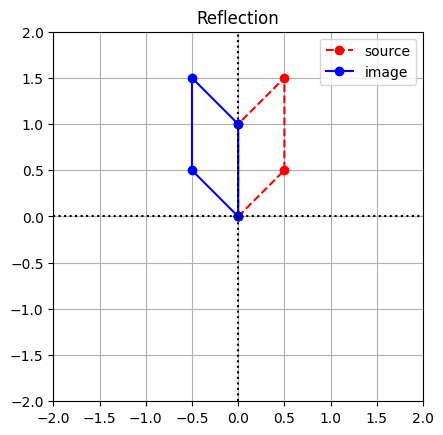

In [5]:
B = np.array([[-1,0],[0,1]])
images = B @ vecs

draw_transformation(vecs, images, title='Reflection');

Мы видим, что данное преобразование отражает точки относительно вертикальной оси.

### Задание 2

Найти матрицу отражения относительно оси проходящей через вектор (1, 1) и нарисовать результат применения матрицы на векторах vecs

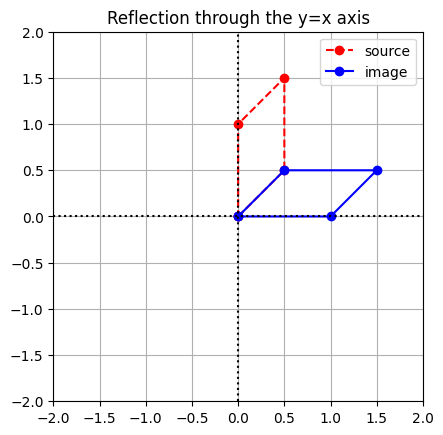

In [6]:
C = np.array([[0, 1], [1, 0]])
images = C @ vecs

draw_transformation(vecs, images, title='Reflection through the y=x axis');



### Пример 3: Поворот
Для вращения векторов в плоскости мы выбираем угол $\theta$ и составляем матрицу, представляющую поворот против часовой стрелки на угол $\theta$. В этом случае для вычисления столбцов можно использовать базовую тригонометрию, найдя образы базисных векторов.  

$$
R = \left[ \begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]
$$

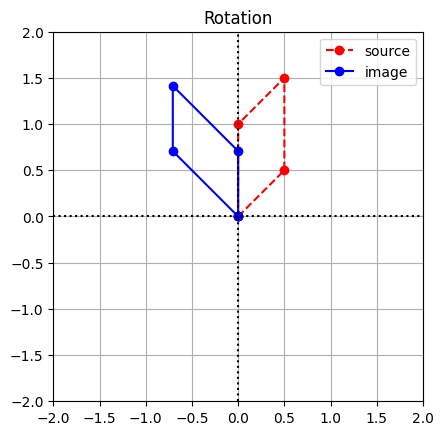

In [7]:
theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
images = R @ vecs

draw_transformation(vecs, images, title='Rotation');

### Задание 3

Найти матрицу поворота по часовой стрелке, нарисовать результат применения этой матрицы на векторы vecs с углом 90 градусов

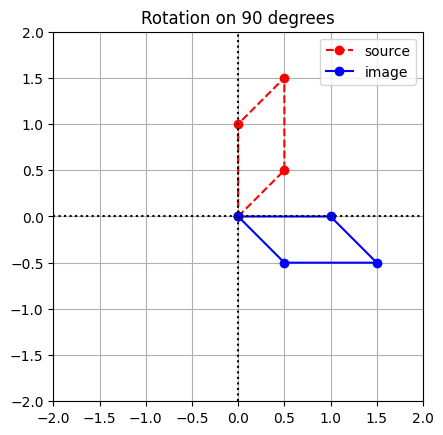

In [8]:
fi = np.pi/2
R_right = np.array([[np.cos(fi), np.sin(fi)],[-np.sin(fi), np.cos(fi)]])
images = R_right @ vecs

draw_transformation(vecs, images, title='Rotation on 90 degrees');

 ### Example 4: Сдвиг(shear)

В механике силы сдвига, или силы сдвига среза, возникают, когда одна сила действует на часть тела, а вторая сила действует на другую часть тела, но в противоположном направлении. Для визуализации представьте себе колоду игральных карт, лежащих на столе, а затем, положив руку сверху на колоду, передвигайте руку параллельно столу.

Сдвиг (shear) – это любое преобразование, смещающее точки в заданном направлении на величину, пропорциональную их исходному (знаковому) расстоянию от линии, параллельной направлению движения и проходящей через начало координат. Например, горизонтальный сдвиг, примененный к вектору, добавит к координате $x$ вектора значение, умноженное на значение его координаты $y$ (или вычтет, если координата $y$ отрицательна). Вертикальный сдвиг выражается матрицей в виде первой матрицы ниже, а горизонтальный сдвиг – второй, где $k \in \mathbb{R}$ называется коэффициентом сдвига.

$$
\left[ \begin{array}{r} 1 & 0 \\ k & 1  \end{array}\right] \hspace{1in}  
\left[ \begin{array}{r} 1 & k \\ 0 & 1  \end{array}\right]  
$$

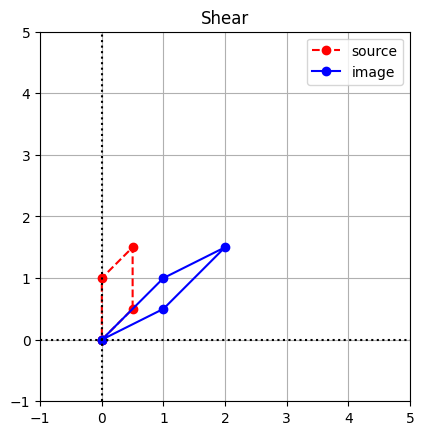

In [9]:
S = np.array([[1,1],[0,1]])
images = S @ vecs

draw_transformation(vecs, images, title='Shear', xlim=(-1, 5), ylim=(-1, 5));

### Пример 5:  Композиция отображений

Одно из преимуществ представления линейных преобразований в виде матриц - это возможность определения композиций с помощью умножения матриц. Например, чтобы найти матрицу, представляющую собой композицию $B\circ R$, где $R$ - это поворот (см. Пример 3), а $B$ - отражение (см. Пример 2), мы можем просто перемножить матрицы, представляющие отдельные преобразования.

$$
[B][R] = \left[ \begin{array}{cc} -1 & 0 \\ 0 & 1 \end{array}\right]
\left[ \begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]
=\left[ \begin{array}{cc} -\cos\theta & \sin\theta \\ \sin\theta & \cos\theta \end{array}\right]
$$

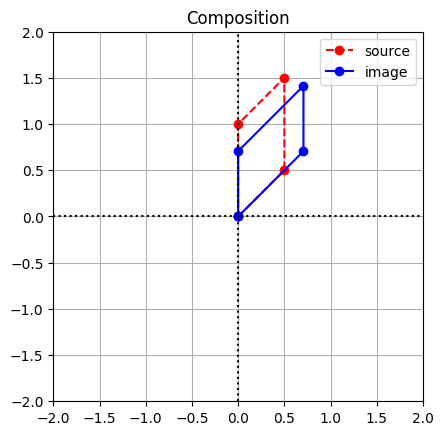

In [10]:
images = B @ R @ vecs

draw_transformation(vecs, images, title='Composition');

### Задание 4

Составьте матрицу композиции сдвига(shear) и поворота на 90 градусов, нарисуйте результат

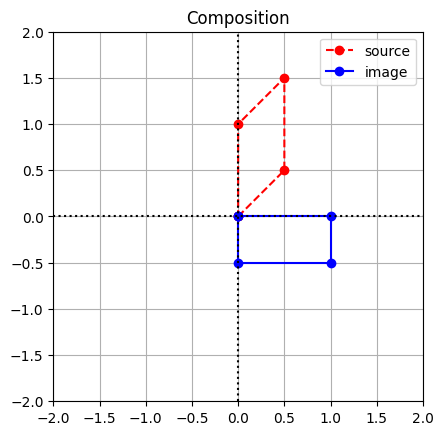

In [11]:
images = S @ R_right @ vecs

draw_transformation(vecs, images, title='Composition');

### Задание 5

В данном задании попробуем применить наши знания о линейных операторах в элементарной графике. Ниже будет задано изображение в около векторном формате следующего вида:

```
image = {
    'block': {
        'color': '#FFFFFF',
        'verteces_polygon': np.array([[...], ...])
    }
}
```

То есть каждое изображение это словарь элементов изображения, каждый элемент это многогранник определенного цвета. 'color' - цвет многогранника, 'verteces_polygon' - вершины многогранника

Ваша задача будет состоять в том, чтобы отразить это изображение вдоль произвольной оси. Для этого вам нужно будет взять знакомую матрицу вертикального отражения и переписать ее в нужном базисе.


In [12]:
##Создаем изображение "тыквы" в формате описанном выше, записываем его в переменную 'pumpkin_image'

def get_pumkin_image(upper_body_coef=1/1.3, stem_coef=1/4, upper_body_centre=None):
    if upper_body_centre is None:
        upper_body_centre = np.array([np.cos(2*np.pi/3), np.sin(2*np.pi/3)])
    pumpkin_image = { 
        'body': {
            'color': '#FF7518',
            'verteces_polygon': np.array(
                [(np.cos(a), np.sin(a))
                    for a in np.linspace(0, 2*np.pi, 12)]
            )
        },
        'upper_body': {
            'color': '#FF7518',
            'verteces_polygon': np.array(
                [np.array([np.cos(a), np.sin(a)]) * upper_body_coef + upper_body_centre
                    for a in np.linspace(0, 2*np.pi, 12)]
            )
        },
        'stem': {
            'color': '#444439',
            'verteces_polygon': np.array(
                [np.array([-0.178, 1]) * upper_body_coef + upper_body_centre + i * stem_coef
                    for i in [np.array((0,0)),
                            np.array((2, 1)),
                            np.array((1, 1.5)),
                            np.array((0, 0))]]
            )
        }
    }
    return pumpkin_image

def affine_polygons(image: dict, scale: float, shift: np.array):
    for k in image:
        image[k]['verteces_polygon'] = scale * image[k]['verteces_polygon'] + shift
    return image

pumpkin_image = affine_polygons(get_pumkin_image(), 1.5, np.array([4, -4]))


In [13]:
from copy import deepcopy
        
def get_basis_mirror(mirror_axis: np.array):
    # Ось зеркала это один вектор, чтобы получить базис нам нужно два
    # с помощью np.linalg.solve попробуйте найти какой-то вектор ортогональный 'mirror_axis'
    # вспомним, что два вектора v, u ортогональны, если скалярное произведение (v, u) = 0
    # верните матрицу, у которой в столбцах записаны базисные вектора
    
    orthogonal_vector = np.array([-mirror_axis[1], mirror_axis[0]])
        
    basis = np.column_stack((mirror_axis, orthogonal_vector))
    return basis
        
def get_reflection(image: dict, mirror_axis: np.array):
    mirror_basis = get_basis_mirror(mirror_axis)
    mirror_transform = np.array([[-1, 0], [0, 1]])
    mirror_basis_inv = np.linalg.inv(mirror_basis)
    transform_in_mirror_basis = mirror_basis_inv @ mirror_transform @ mirror_basis
    reflection_image = deepcopy(image)
    for k in reflection_image:
        reflection_image[k]['verteces_polygon'] = (transform_in_mirror_basis @ reflection_image[k]['verteces_polygon'].T).T

    return reflection_image



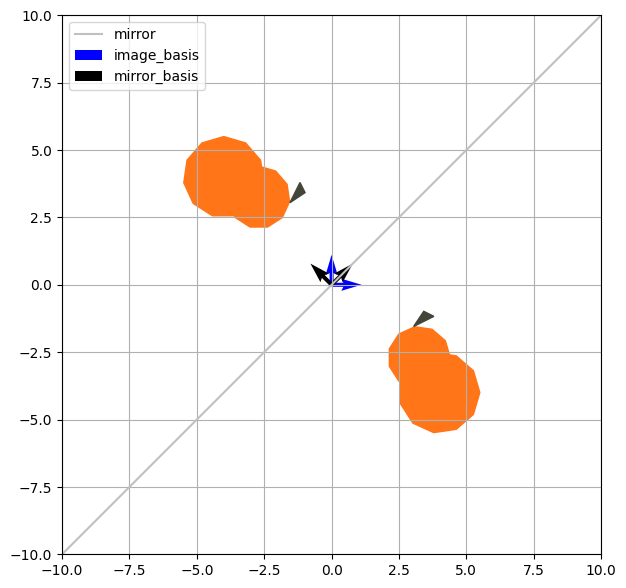

In [14]:
def draw_polygons(image: dict, ax: plt.axes) -> None:
    for k in image:
        ax.fill(image[k]['verteces_polygon'][:, 0],
                image[k]['verteces_polygon'][:, 1],
                c=image[k]['color'])

def draw_image_with_reflection(image: dict, mirror_axis: np.array,
                               figsize=(16, 7), xlim=(-10, 10), ylim=(-10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    reflection_image = get_reflection(image, mirror_axis)
    draw_polygons(image, ax)
    draw_polygons(reflection_image, ax)
    #mirror line
    ax.axline((0, 0), mirror_axis, label='mirror', c='silver')
    #basis vectors
    mirror_basis = get_basis_mirror(mirror_axis)
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], label='image_basis', color='blue')
    ax.quiver([0, 0], [0, 0], mirror_basis[0, :], mirror_basis[1, :], label='mirror_basis')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_aspect("equal")
    ax.legend()

draw_image_with_reflection(pumpkin_image, np.array([np.cos(np.pi/4), np.sin(np.pi/4)]))